<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных" data-toc-modified-id="Обзор-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Кодирование-данных" data-toc-modified-id="Кодирование-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Кодирование данных</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-моделей" data-toc-modified-id="Обучение-и-проверка-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

**Иcходные данные**

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Цель исследования**

Построить модель для определения стоимости.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Ход исследования**

1. Обзор и подготовка данных.
2. Обучение и проверка различных моделей.
3. Анализ характеристик работы моделей.
4. Выбор и финальное тестирование лучшей модели.

## Обзор и подготовка данных

### Импорт библиотек

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_profiling

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


### Обзор данных

In [88]:
# сохраним данные в переменную

pth1 = 'autos.csv'
pth2 = '/datasets/autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df =  pd.read_csv(pth2)
else:
    print('Файл не найден!')

Посмотрим исходные данные.

In [89]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Имеем в наличии 354369 объектов и 16 признаков.

Согласно документации к данным:

**Признаки**

* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `NotRepaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя

**Целевой признак**

* `Price` — цена (евро)

Можем сделать следующие выводы:
1. По части данных имеем пропуски. Их необходимо проанализировать и устранить.
2. Признак `DateCrawled` вряд ли повлияет на цену автомобиля. Из него можно было бы сделать индекс или удалить.
3. `DateCreated` нуждается в дополнительном анализе. Было бы замечательно уточнить у заказчика - эквиволентно ли это поле дате размещения объявления о продаже. Год и месяц размещения объявления могут влиять на цену.
4. `LastSeen` - теоретически может говорить о скорости продажи автомобиля.
5. `RegistrationMonth` - отдельно от года вряд ли повлияет на цену автомобиля. Возможно лучше удалить.
6. `PostalCode` — может быть признаком региона.
7. Необходимо также проверить даты на дублекаты и аномалии. В часности, в значениях признка `Power` и `Price` нет пропусков, но есть аномальные значения - 0.
8. 9 из 16 признаков категориальные. Даты будут иметь другой тип после обработки. А вот `VehicleType`, `Gearbox`, `Model`, `FuelType`, `Brand`, возможно, придется кодировать. Возможно, `Model` и `Brand` можно объединить в один признак, так как они связаны.

### Предобработка данных

Удалим признаки с датой выгрузки и месяцем регистрации автомобиля.

In [91]:
df = df.drop(['DateCrawled', 'RegistrationMonth'], axis=1)


Изменим тип данных для дат.

In [92]:
list = ['DateCreated', 'LastSeen']
for _ in list:
    df[_] = pd.to_datetime(df[_], format='%Y-%m-%d %H:%M:%S')

`DateCreated` разделим на год и месяц. Дата не имеет значения.

In [93]:
df['YearCreated'] = df['DateCreated'].dt.year
df['MonthCreated'] = df['DateCreated'].dt.month
df = df.drop('DateCreated', axis=1)

Признак `LastSeen` будет иметь смысл удалить после проверки на дублекаты.

In [94]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             354369 non-null  int64         
 1   VehicleType       316879 non-null  object        
 2   RegistrationYear  354369 non-null  int64         
 3   Gearbox           334536 non-null  object        
 4   Power             354369 non-null  int64         
 5   Model             334664 non-null  object        
 6   Kilometer         354369 non-null  int64         
 7   FuelType          321474 non-null  object        
 8   Brand             354369 non-null  object        
 9   NotRepaired       283215 non-null  object        
 10  NumberOfPictures  354369 non-null  int64         
 11  PostalCode        354369 non-null  int64         
 12  LastSeen          354369 non-null  datetime64[ns]
 13  YearCreated       354369 non-null  int64         
 14  Mont

Посмотрим за сколько лет данные.

In [95]:
df['YearCreated'].max()

2016

In [96]:
df['YearCreated'].min()

2014

Данные за 2 года, соответственно цена может зависеть от года. Скорость продажи может коррелировать с датой последнего посещения. Пока оставим оба признака.

Посмтрим признаки с пропусками.

In [97]:
df.isna().sum()

Price                   0
VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Kilometer               0
FuelType            32895
Brand                   0
NotRepaired         71154
NumberOfPictures        0
PostalCode              0
LastSeen                0
YearCreated             0
MonthCreated            0
dtype: int64

Тип кузова частично может быть возможно восстановить по модели авто.

Тип коробки передач восстановить вряд ли удастся, только если определенная модель не имеет вариантов исполнения, что сложно установить.

Пропуски признака модель восстановить не удастся. Кроме того - это один из важнейших призаков. В анкете стоило бы выделить его как обязательный.

Тип топлива также проблемотично восстановить.

Данные об аварийности сильно влияют на цену, восстановить их нельзя.

Попробуем восстановить данные, которые возможно восстановить. Пропуски в некоторых категориях можно заменить на 'unknown', а некоторые удалить. 

Для начала посмотрим, какие значения могут принимать эти категориальные признаки.

In [98]:
list = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

for _ in list:
    print(f'Список значений признака {_}:')
    print(df[_].value_counts(ascending=False))
    print()

Список значений признака VehicleType:
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Список значений признака Gearbox:
manual    268251
auto       66285
Name: Gearbox, dtype: int64

Список значений признака Model:
golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
astra                 10809
passat                10146
a4                     9900
c_klasse               8312
5er                    7868
e_klasse               6785
a3                     6122
focus                  5874
fiesta                 5774
a6                     5541
twingo                 4953
transporter            4822
2_reihe                4816
fortwo                 4337
vectra                 4254
a_klasse               4193
mondeo                 3601
clio            

Заменим прпуски во всех категориальных признаках на 'unknown'.

In [99]:
for _ in list:
    df[_] = df[_].fillna('unknown')

In [100]:
# прверка
df.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
NumberOfPictures    0
PostalCode          0
LastSeen            0
YearCreated         0
MonthCreated        0
dtype: int64

По признакам `Model` и `Brand` имеет смысл дополнительно просмотреть уникальные занчения. Могут быть неявные дублекаты.

In [101]:
pd.set_option('display.max_rows', None)
list = ['Model', 'Brand']
for _ in list:
    print(f'Список значений признака {_}:')
    print(pd.Series(df[_].unique()).sort_values())
    print()

Список значений признака Model:
59                    100
232                   145
58                    147
41                    156
130                   159
113               1_reihe
30                    1er
234                   200
5                 2_reihe
176                  300c
8                 3_reihe
4                     3er
121               4_reihe
123                   500
91                5_reihe
16                    5er
208                   601
86                6_reihe
96                    6er
56                    7er
57                     80
219                   850
154                    90
203                   900
230                  9000
170                   911
47                     a1
108                    a2
69                     a3
46                     a4
122                    a5
52                     a6
34                     a8
14               a_klasse
135                accord
157                 agila
147              alhambra
70    

Обнаружены неявные дублекаты rangerover и range_rover. Выполним замену.

In [102]:
df['Model'] = df['Model'].replace({'rangerover': 'range_rover'})

Проверим.

In [103]:
df[df['Model'] == 'rangerover']

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,NumberOfPictures,PostalCode,LastSeen,YearCreated,MonthCreated


Проверим численные признаки на выбросы и аномальные значения.

In [104]:
for col in df.columns:
    print(col, 'содержит нулевые значения в количестве:')
    print(df[df[col] == 0][col].count())
    print()

Price содержит нулевые значения в количестве:
10772

VehicleType содержит нулевые значения в количестве:
0

RegistrationYear содержит нулевые значения в количестве:
0

Gearbox содержит нулевые значения в количестве:
0

Power содержит нулевые значения в количестве:
40225

Model содержит нулевые значения в количестве:
0

Kilometer содержит нулевые значения в количестве:
0

FuelType содержит нулевые значения в количестве:
0

Brand содержит нулевые значения в количестве:
0

NotRepaired содержит нулевые значения в количестве:
0

NumberOfPictures содержит нулевые значения в количестве:
354369

PostalCode содержит нулевые значения в количестве:
0

LastSeen содержит нулевые значения в количестве:
0

YearCreated содержит нулевые значения в количестве:
0

MonthCreated содержит нулевые значения в количестве:
0



Таким образом имеем:

* Порядка 3% пропусков в значениях `Price`. Это целевой признак. Строки с пропусками можно удалить.
* Порядка 12% пропусков в значениях `Power`. Нужно посмтореть - если присутсвует значение модели авто, пропуски удастся заполнить. Однако, это могут быть машины без двигателя.
* 100% пропусков у признака `NumberOfPictures`. Возможно произошел какой-то сбой в БД, но по этому признаку мы ничего не предскажем. Удаляем.

Проверим данные на аномалии в других столбцах.

График распределения значений Price:
Все значения лежат в диапазоне от 0 до 20000


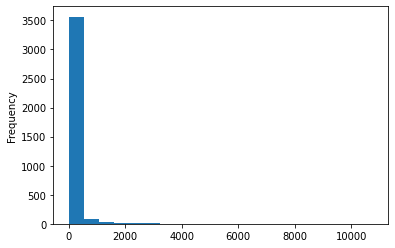


График распределения значений RegistrationYear:
Все значения лежат в диапазоне от 1000 до 9999


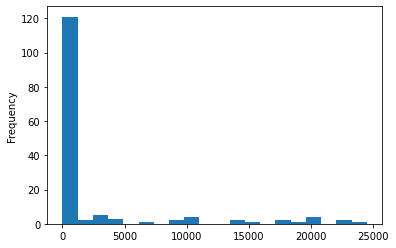


График распределения значений Power:
Все значения лежат в диапазоне от 0 до 20000


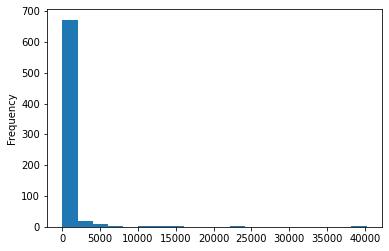


График распределения значений Kilometer:
Все значения лежат в диапазоне от 5000 до 150000


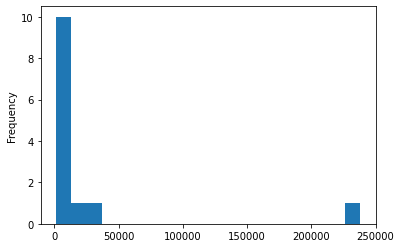


График распределения значений NumberOfPictures:
Все значения лежат в диапазоне от 0 до 0


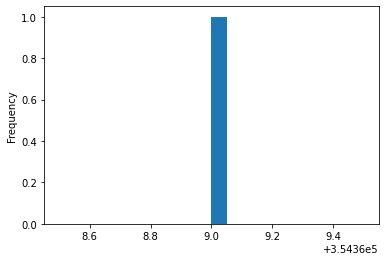


График распределения значений PostalCode:
Все значения лежат в диапазоне от 1067 до 99998


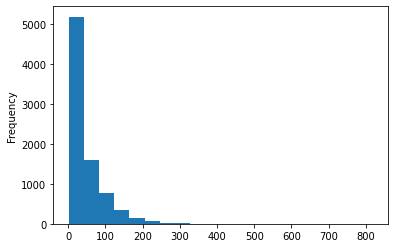


График распределения значений YearCreated:
Все значения лежат в диапазоне от 2014 до 2016


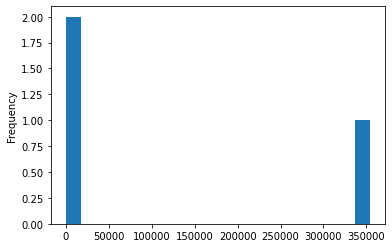


График распределения значений MonthCreated:
Все значения лежат в диапазоне от 1 до 12


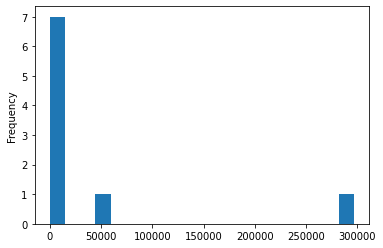

In [105]:
list = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'NumberOfPictures', 'PostalCode', 'YearCreated', 'MonthCreated']
for col in list:
    print(f'График распределения значений {col}:')
    df[col].value_counts().plot(kind='hist', bins = 20)
    print(f'Все значения лежат в диапазоне от {df[col].min()} до {df[col].max()}')
    plt.show()
    print()

In [106]:
# удалим пустой признак
df = df.drop('NumberOfPictures', axis=1)

In [107]:
# оставим только строки, где значение целевого признака определено и больше 10
df = df[df['Price'] > 10]

In [108]:
# оставим только строки, где год регистрации авто лежит в адекватном диапазоне.
df = df.query('1850 < RegistrationYear < 2017')

Чтобы сделать вывод о том, является ли нулевая мощность аномалией или это автомобили без ДВС, проверим корреляцию между ценой и мощностью.

,Power,Price
Power,1.000000,0.163038
Price,0.163038,1.000000


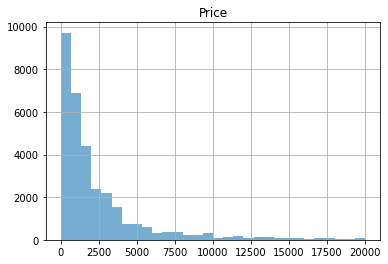

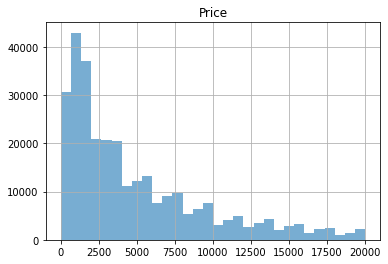

In [109]:
display(df[['Power', 'Price']].corr())

df.loc[df['Power'] == 0, ['Price']].hist(bins=30, alpha=0.6);
df.loc[df['Power'] > 0, ['Price']].hist(bins=30, alpha=0.6);

Разницы в распределении стоимости установить не удалось. Делаем вывод, что нулевая мощность не связана с отсутствием ДВС.

Посмотрим строки с 0 в данных о мощности.

In [110]:
df[df['Power'] == 0].head(15)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,LastSeen,YearCreated,MonthCreated
0,480,unknown,1993,manual,0,golf,150000,petrol,volkswagen,unknown,70435,2016-04-07 03:16:57,2016,3
15,450,small,1910,unknown,0,ka,5000,petrol,ford,unknown,24148,2016-03-19 08:46:47,2016,3
32,245,sedan,1994,unknown,0,golf,150000,petrol,volkswagen,no,44145,2016-03-17 18:17:43,2016,3
37,1500,unknown,2016,unknown,0,kangoo,150000,gasoline,renault,no,46483,2016-03-30 09:18:02,2016,3
54,4700,wagon,2005,manual,0,signum,150000,unknown,opel,no,88433,2016-04-04 04:17:32,2016,3
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes,56759,2016-04-01 23:17:27,2016,3
69,1200,coupe,2001,unknown,0,astra,150000,unknown,opel,unknown,47249,2016-04-07 08:46:07,2016,4
70,800,small,1993,manual,0,polo,150000,petrol,volkswagen,no,8258,2016-04-05 23:46:00,2016,3
90,2400,sedan,2003,manual,0,a4,150000,gasoline,audi,unknown,40210,2016-03-23 11:53:21,2016,3
94,8390,unknown,2009,unknown,0,insignia,150000,unknown,opel,unknown,29221,2016-03-30 07:44:59,2016,3


Заполним часть пропусков медиальным значением по соответствующим моделям (необходимо исключить 'unknown').

In [111]:
models = df[df['Power'] == 0]['Model'].unique()

for model in models:
    if model != 'unknown':
        power = df.loc[(df['Power'] != 0) & (df['Model'] == model), 'Power'].median()
        df.loc[(df['Power'] == 0) & (df['Model'] == model), 'Power'] = power

Выполним проверки.

In [112]:
df[df['Power'] == 0]['Power'].count()

4207

In [113]:
df[df['Power'].isna()]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,LastSeen,YearCreated,MonthCreated
234296,3800,wagon,1978,manual,NaN,serie_1,30000,gasoline,land_rover,unknown,49824,2016-03-30 11:39:08,2016,3


Имеем одно значение NaN.

In [114]:
df[df['Model'] == 'serie_1']

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,LastSeen,YearCreated,MonthCreated
234296,3800,wagon,1978,manual,NaN,serie_1,30000,gasoline,land_rover,unknown,49824,2016-03-30 11:39:08,2016,3


В данных остался всего один авто данной модели. Удалим.

In [115]:
df = df[df['Model'] != 'serie_1']

Вернем тип данных int.

In [116]:
df['Power'] = np.int16(df['Power'])

Теперь можно выполнить праверку на дубликаты. Несмотря на остутствие идентификаторов, вероятность того, что разные объявления со всеми одинаковыми данными авто загружены в один день и пользователь в последний раз появлялся в одно и тоже время с точностью до секунды крайне мала.

In [117]:
df.duplicated().sum()

96

Удалим дублекаты.

In [118]:
df = df.drop_duplicates()

# проверка
df.duplicated().sum()

0

После проверки на дублекаты столбец с последним посещением пользователя можно все-таки удалить. Вероятность связи с ценой небольшая, а в случае кодирования, потребуются лишние ресурсы.

In [119]:
df = df.drop('LastSeen', axis=1)

Посмотрим итоговые данные.

In [120]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328401 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             328401 non-null  int64 
 1   VehicleType       328401 non-null  object
 2   RegistrationYear  328401 non-null  int64 
 3   Gearbox           328401 non-null  object
 4   Power             328401 non-null  int16 
 5   Model             328401 non-null  object
 6   Kilometer         328401 non-null  int64 
 7   FuelType          328401 non-null  object
 8   Brand             328401 non-null  object
 9   NotRepaired       328401 non-null  object
 10  PostalCode        328401 non-null  int64 
 11  YearCreated       328401 non-null  int64 
 12  MonthCreated      328401 non-null  int64 
dtypes: int16(1), int64(6), object(6)
memory usage: 33.2+ MB
None


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,YearCreated,MonthCreated
0,480,unknown,1993,manual,101,golf,150000,petrol,volkswagen,unknown,70435,2016,3
1,18300,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes,66954,2016,3
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown,90480,2016,3
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074,2016,3
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437,2016,3


Данные обработаны.

Для работы с большинством моделей нам потребуется кодирование.

### Кодирование данных

Для Бустинга и линейных моделей используем кодирование OHE

In [121]:
df_ohe = pd.get_dummies(df, drop_first=True)

Для Случайного леса и Бэгинга воспользуемся более локаничной версией кодирования - ordinal encoder.

In [122]:
category_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

encoder = OrdinalEncoder()
encoder.fit(df[category_features])
df_oe = df
df_oe[category_features] = encoder.transform(df_oe[category_features])

### Разделение данных на выборки

Отделим целевой признак, создадим тренировочную и тестовую. Мы будем использовать кросс-валидацию, поэтому валидационная выборка нам не понадобиться.

Сделаем наборы данных с кодированием OHE и OE.

Данные с кодированием OHE.

In [123]:
features_ohe = df_ohe.drop('Price', axis=1)
target_ohe = df_ohe['Price']

In [124]:
# отделим тестовую выборку

train_features_ohe, test_features_ohe, train_target_ohe, test_target_ohe = train_test_split(features_ohe, target_ohe, random_state=42, test_size=0.25)

Данные с кодированием OE.

In [125]:
features_oe = df_oe.drop('Price', axis=1)
target_oe = df_oe['Price']

In [126]:
train_features_oe, test_features_oe, train_target_oe, test_target_oe = train_test_split(features_oe, target_oe, random_state=42, test_size=0.25)

## Обучение и проверка моделей

Проверим следующие модели:

1. LightGBM
2. CatBoost
3. Ансамбль линейных моделей
4. RandomForestRegressor
5. ElasticNet

Обучим модель LightGBM.

In [127]:
%%time 

# займет 1 мин

parametrs_lgbm = {'learning_rate': np.arange(0.1, 1.0, 0.1),
             'reg_alpha': [0.2],
             'reg_lambda': [0.1]}

gs_model_lgbm = LGBMRegressor(random_state=42)
gs_lgbm = GridSearchCV(gs_model_lgbm, parametrs_lgbm, scoring='neg_root_mean_squared_error', n_jobs=-1)
gs_lgbm.fit(train_features_ohe, train_target_ohe)

model_lgbm = gs_lgbm.best_estimator_
score_lgbm = abs(gs_lgbm.best_score_)
fit_time_lgbm = np.mean(gs_lgbm.cv_results_['mean_fit_time'])
score_time_lgbm = np.mean(gs_lgbm.cv_results_['mean_score_time'])


print(f'RMSE LightGBM на валидационной выборке: {score_lgbm:.2f}')
print(f'Время обучения LightGBM: {fit_time_lgbm:.2f} c')
print(f'Время предсказания LightGBM: {score_time_lgbm:.2f} c')

RMSE LightGBM на валидационной выборке: 1632.83
Время обучения CatBoost: 8.99 c
Время предсказания CatBoost: 1.16 c
CPU times: total: 12 s
Wall time: 1min 7s


Создадим таблицу значений.

In [128]:
# добавим данные lgbm

time_sheet = pd.DataFrame(['LGBM', score_lgbm, fit_time_lgbm, score_time_lgbm], index=['Model', 'RMSE', 'FitTime', 'ScoreTime'])

Обучим CatBoost

In [129]:
%%time 

# займет 22 сек

parametrs_cbr = {'depth': range(2, 11, 2),
             'iterations': [10, 15],
             'learning_rate': [0.5],
             'reg_lambda': [0.1]}

gs_model_cbr = CatBoostRegressor(random_state=42, verbose=False)
gs_cbr = GridSearchCV(gs_model_cbr, parametrs_cbr, scoring='neg_root_mean_squared_error', n_jobs=-1)
gs_cbr.fit(train_features_ohe, train_target_ohe)

model_cbr = gs_cbr.best_estimator_
score_cbr = abs(gs_cbr.best_score_)
fit_time_cbr = np.mean(gs_cbr.cv_results_['mean_fit_time'])
score_time_cbr = np.mean(gs_cbr.cv_results_['mean_score_time'])

print(f'RMSE CatBoost на валидационной выборке: {score_cbr:.2f}')
print(f'Время обучения CatBoost: {fit_time_cbr:.2f} c')
print(f'Время предсказания CatBoost: {score_time_cbr:.2f} c')

RMSE CatBoost на валидационной выборке: 1783.24
Время обучения CatBoost: 7.19 c
Время предсказания CatBoost: 0.11 c
CPU times: total: 11.9 s
Wall time: 51.1 s


In [130]:
# добавим данные CatBoost

time_sheet[1] = ['CatBoost', score_cbr, fit_time_cbr, score_time_cbr]

Обучим ElasticNet.

In [131]:
%%time 

# займет 4 с

model_en = None
score_en = 999999
best_ratio = 0

for ratio in range(1, 9, 1):
    model = ElasticNet(random_state=42, l1_ratio=(ratio/10), max_iter=500)
    scores = cross_validate(model, train_features_ohe, train_target_ohe, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=4)
    score = pd.Series(abs(scores['test_score'])).mean()
    if score < score_en:
        score_en = score
        model_en = model
        best_ratio = ratio
        fit_time_en = pd.Series(scores['fit_time']).mean()
        score_time_en = pd.Series(scores['score_time']).mean()

print(f'RMSE ElasticNet на валидационной выборке: {score_en:.2f}')
print(f'Параметр l1_ratio: {best_ratio}')
print(f'Время обучения ElasticNet: {fit_time_en:.2f} c')
print(f'Время предсказания ElasticNet: {score_time_en:.2f} c')

RMSE ElasticNet на валидационной выборке: 3351.85
Параметр l1_ratio: 8
Время обучения ElasticNet: 8.75 c
Время предсказания ElasticNet: 0.34 c
CPU times: total: 1.19 s
Wall time: 1min 9s


In [132]:
# добавим данные ElasticNet

time_sheet[2] = ['ElasticNet', score_en, fit_time_en, score_time_en]

Для Случайного леса и Бэгинга воспользуемся более локаничной версией кодирования - ordinal.

Обучим Ансамбль линейной регрессии без GridSearch из-за скорости работы.

In [133]:
%%time 

# займет 50 сек

model_blr = None
score_blr = 999999

for est in range(10, 51, 10):
    model = BaggingRegressor(base_estimator=LinearRegression(), random_state=42, n_estimators=est, bootstrap=True)
    scores = cross_validate(model, train_features_oe, train_target_oe, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=4)
    score = pd.Series(abs(scores['test_score'])).mean()
    if score < score_blr:
        score_blr = score
        model_blr = model
        fit_time_blr = pd.Series(scores['fit_time']).mean()
        score_time_blr = pd.Series(scores['score_time']).mean()

print(f'RMSE BaggingRegressor на валидационной выборке: {score_blr:.2f}')
print(f'Время обучения BaggingRegressor: {fit_time_blr:.2f} c')
print(f'Время предсказания BaggingRegressor: {score_time_blr:.2f} c')

RMSE BaggingRegressor на валидационной выборке: 3419.25
Время обучения BaggingRegressor: 13.99 c
Время предсказания BaggingRegressor: 0.39 c
CPU times: total: 453 ms
Wall time: 45.1 s


In [134]:
# добавим данные BaggingRegressor 

time_sheet[3] = ['BaggingRegressor', score_blr, fit_time_blr, score_time_blr]

Обучим RandomForestRegressor без GridSearch из-за скорости работы.

In [135]:
%%time 

# займет около 2 минут

model_rfr = None
score_rfr = 999999
best_est = 0

for est in range(10, 61, 10):
    model = RandomForestRegressor(random_state=42, n_estimators=est, max_depth=10)
    scores = cross_validate(model, train_features_oe, train_target_oe, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=4)
    score = pd.Series(abs(scores['test_score'])).mean()
    if score < score_rfr:
        score_rfr = score
        model_rfr = model
        best_est = est
        fit_time_rfr = pd.Series(scores['fit_time']).mean()
        score_time_rfr = pd.Series(scores['score_time']).mean()

print(f'RMSE RandomForestRegressor на валидационной выборке: {score_rfr:.2f}')
print(f'Параметр n_estimators: {best_est}')
print(f'Время обучения RandomForestRegressor: {fit_time_rfr:.2f} c')
print(f'Время предсказания RandomForestRegressor: {score_time_rfr:.2f} c')

RMSE RandomForestRegressor на валидационной выборке: 1896.39
Параметр n_estimators: 60
Время обучения RandomForestRegressor: 36.27 c
Время предсказания RandomForestRegressor: 0.46 c
CPU times: total: 641 ms
Wall time: 2min 12s


In [136]:
# добавим данные RandomForestRegressor 

time_sheet[4] = ['RandomForestRegressor', score_rfr, fit_time_rfr, score_time_rfr]

## Анализ моделей

Мы получили следующие характеристики:

In [137]:
time_sheet

,0,1,2,3,4
Model,LGBM,CatBoost,ElasticNet,BaggingRegressor,RandomForestRegressor
RMSE,1632.83483,1783.243296,3351.854638,3419.25274,1896.392176
FitTime,8.991399,7.192791,8.746871,13.992639,36.266429
ScoreTime,1.162857,0.110952,0.33729,0.39401,0.458719


Из всех полученных моделей самую высокую точность имеет LightGBM. При этом она не является слишком долгой.
Кроме того, если обучить модель по данным df_oe, скорость увеличится более чем в 2 раза, а качество почти не изменится.

## Тестирование лучшей модели

Протестируем модель LightGBM.

In [138]:
test_predict = model_lgbm.predict(test_features_ohe)
test_score = mean_squared_error(test_target_ohe, test_predict, squared=False)
print(f'RMSE лучшей модели на тестовой выборке: {test_score:.2f}')

RMSE лучшей модели на тестовой выборке: 1642.19


## Вывод

Мы подобрали модель с самой высокой точностью и средней скоростью обучения LightGBM. Для увеличения скорости работы имеет смысл кодировать данные методом Ordinal Encoder, на точность это практически не влияет, а скорост обучения увеличивается более чем в 2 раза.